<a href="https://colab.research.google.com/github/TheKreator666/Ekpa-ai-cyber-security-course/blob/main/CyberThreatHunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2-2906775069.py:28: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort=True)


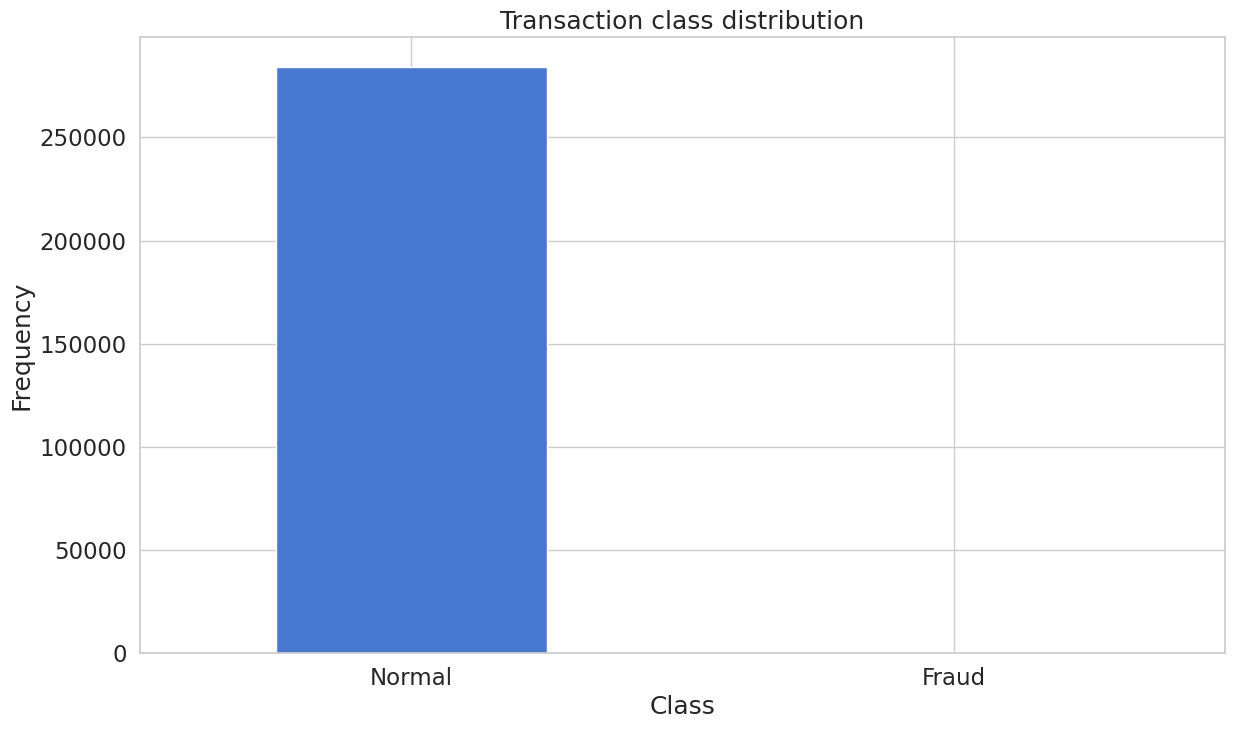

=== Evaluation Metrics ===
Accuracy: 0.9995
Precision: 0.9573
Recall: 0.7568
F1-score: 0.8453


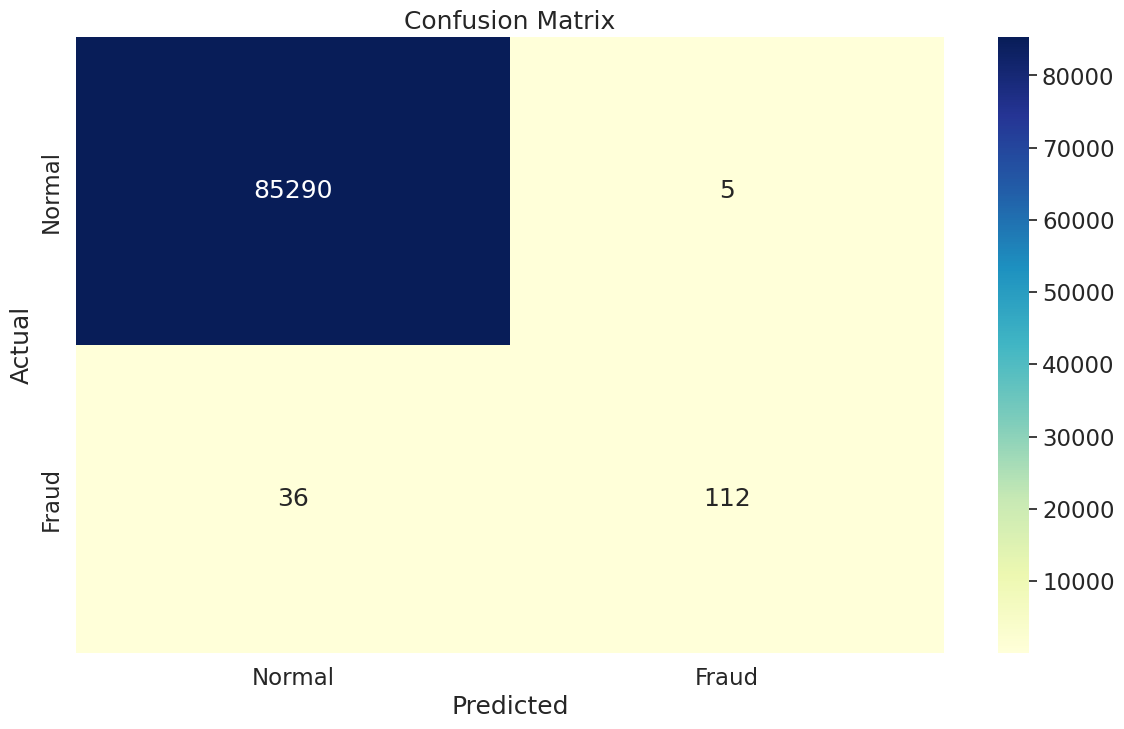

In [2]:
# Φόρτωση βιβλιοθηκών
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# Ενεργοποίηση inline plots (μόνο σε Jupyter)
%matplotlib inline

# Ρυθμίσεις εμφάνισης
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

# Φόρτωση συνόλου δεδομένων
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
data = pd.read_csv(url)

# Διαγραφή μη αριθμητικών και κενών τιμών
data = data.select_dtypes(include=['float64', 'int64']).dropna()

# Οπτικοποίηση κατανομής της μεταβλητής "Class"
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Διαχωρισμός χαρακτηριστικών (X) και στόχου (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Διαχωρισμός σε σύνολο εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y
)

# Δημιουργία και εκπαίδευση Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
model.fit(X_train, y_train)

# Πρόβλεψη συνόλου δοκιμής
y_pred = model.predict(X_test)

# Υπολογισμός μετρικών αξιολόγησης
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Εμφάνιση αποτελεσμάτων
print("=== Evaluation Metrics ===")
print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-score:", round(f1, 4))

# Οπτικοποίηση confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
